In [1]:
import networkx as nx
import metis
G = metis.example_networkx()
(edgecuts, parts) = metis.part_graph(G, 3)
colors = ['red','blue','green']
for i, p in enumerate(parts):
     G.node[i]['color'] = colors[p]

In [2]:
G.node

{0: {'color': 'red'},
 1: {'color': 'red'},
 2: {'color': 'red'},
 3: {'color': 'red'},
 4: {'color': 'red'},
 5: {'color': 'red'},
 6: {'color': 'blue'},
 7: {'color': 'green'},
 8: {'color': 'green'},
 9: {'color': 'green'},
 10: {'color': 'green'},
 11: {'color': 'green'},
 12: {'color': 'green'},
 13: {'color': 'blue'},
 14: {'color': 'blue'},
 15: {'color': 'blue'},
 16: {'color': 'blue'},
 17: {'color': 'blue'},
 18: {'color': 'blue'}}

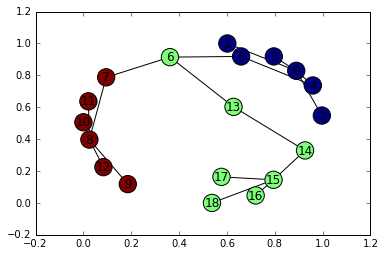

In [3]:
%matplotlib inline
nx.draw_networkx(G, node_color=parts)
#(G, 'example.dot') # Requires pydot or pygraphviz

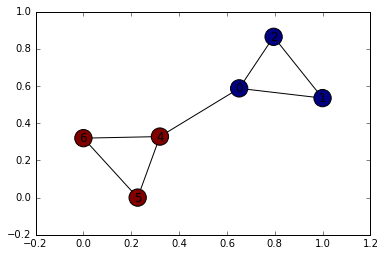

In [4]:
g2 = nx.Graph([(0,1), (0,2), (1,2), (0,4), (4,5), (4,6), (5,6)])
p2 = metis.part_graph(g2,2)
nx.draw_networkx(g2, node_color=p2[1])

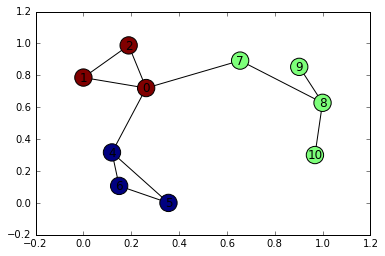

In [5]:
g3 = nx.Graph([(0,1), (0,2), (1,2), (0,4), 
               (4,5), (4,6), (5,6),
               (0, 7), (7, 8), (8,9), (8, 10)])
nx.draw_networkx(g3, node_color=metis.part_graph(g3,3)[1])

In [6]:
import numpy as np
import random

def gen_random_sparse(edges=100,
                      vertices=10,
                      seed=1234):
    
    random.seed(seed)
    
    a = np.random.randint(0, edges, vertices*edges)
    b = np.random.randint(0, edges, vertices*edges)
    
    return (a,b)

def gen_random_graph(edges=100,
                     vertices=10,
                     seed=1234):
    
    (a,b) = gen_random_sparse(edges, vertices, seed)
    
    g = nx.Graph(zip(a,b))
    
    return g

In [1]:
g = gen_random_graph(edges=40, vertices=4)

import pylab
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

(c,p) = metis.part_graph(g, 5, objtype='cut', ufactor=1000, contig=True, niter=20)

print(c)

nx.draw_networkx(g, node_color=p)

NameError: name 'gen_random_graph' is not defined

In [8]:
for i in range(10, 15):
    print(2**i)
    g = gen_random_graph(edges=2**i, vertices=20)
    %time metis.part_graph(g, int(2**i/10))

1024
CPU times: user 136 ms, sys: 0 ns, total: 136 ms
Wall time: 139 ms
2048
CPU times: user 284 ms, sys: 4 ms, total: 288 ms
Wall time: 288 ms
4096
CPU times: user 628 ms, sys: 0 ns, total: 628 ms
Wall time: 630 ms
8192
CPU times: user 1.3 s, sys: 4 ms, total: 1.3 s
Wall time: 1.3 s
16384
CPU times: user 2.99 s, sys: 20 ms, total: 3.01 s
Wall time: 3.02 s


In [9]:
# %time g_big = gen_random_graph(edges=2**20, vertices=40)

# %time (cuts, parts) = metis.part_graph(g_big, int(2**20/30))

In [10]:
import memory_profiler
%load_ext memory_profiler

n = 2**15

%time %memit gb = gen_random_graph(edges=n, vertices=30)

peak memory: 710.32 MiB, increment: 396.20 MiB
CPU times: user 2.54 s, sys: 116 ms, total: 2.65 s
Wall time: 2.77 s


In [11]:
gb.graph['node_weight_attr'] = 'weight'
for i in range(n): 
    gb.node[i]['weight'] = 1

In [19]:
%time (cuts, parts) = metis.part_graph(gb, int(n/4), iptype='random', ufactor=30000)

print (cuts, np.max(parts), int(n/20))

CPU times: user 6.69 s, sys: 16 ms, total: 6.7 s
Wall time: 6.71 s
899723 2499 500


In [20]:
import pandas as pd

df = pd.DataFrame({'part': parts})
print(np.unique(parts))
gp = df.part.value_counts()
gp.describe()

[ 603  618  619  897  931  936 1087 1092 1165 1169 1170 1203 1204 1209 1228
 1229 1234 1239 1244 1248 1249 1556 1561 1712 1716 1717 1790 1794 1795 1834
 1844 1849 1854 1859 1863 1864 1868 1869 1873 1874 1991 2025 2030 2098 2103
 2107 2108 2141 2146 2147 2156 2161 2165 2166 2171 2176 2180 2181 2185 2186
 2249 2292 2293 2302 2303 2322 2326 2327 2331 2332 2336 2341 2342 2371 2380
 2381 2394 2395 2400 2405 2409 2410 2414 2415 2419 2420 2438 2439 2448 2449
 2454 2458 2459 2463 2464 2469 2473 2474 2478 2479 2483 2484 2486 2488 2489
 2493 2494 2495 2496 2497 2498 2499]


count    112.000000
mean     292.571429
std      111.111478
min       83.000000
25%      188.000000
50%      232.500000
75%      406.000000
max      406.000000
Name: part, dtype: float64

In [14]:
n = 10000
nadj = 20
adj = [tuple(i + np.random.randint(1, nadj, nadj)) for i in range(n-nadj)] + list([()] * nadj)
len(adj)

10000

%time (cuts, parts) = metis.part_graph(adj, int(n/20), iptype='random', ufactor=10000)
print(cuts, len(parts), len(np.unique(parts)))

x = np.zeros(10)
tuple(x)